# Question 1 - Analysis 1

In [71]:
import glob 
import collections
import matplotlib.pyplot as plt
from email.parser import Parser

In [72]:
def convert_date(date_list):
    month_dict = {'Jan': '01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
    month = month_dict[date_list[1]]
    year = date_list[2]
    return year+month

In [78]:
filepaths = glob.glob("/Users/lizhiming/Desktop/maildir/skilling-j/_sent_mail/*", recursive = True)
date_list = []
for name in filepaths:
    with open(name, 'r') as file:
        data = file.read()
        email = Parser().parsestr(data)
        date = email['Date'].split(', ',1)[1].split(' ',3)[:3]
        date = convert_date(date)
        date_list.append(date)

In [74]:
date_freq = collections.Counter()
for date in date_list:
    date_freq[date] += 1
od = collections.OrderedDict(sorted(date_freq.items(), key=lambda t: t[0]))

In [75]:
x_list = []
y_list = []
for item in od.items():
    x_list.append(item[0][4:6]+'/'+item[0][:4])
    y_list.append(item[1])

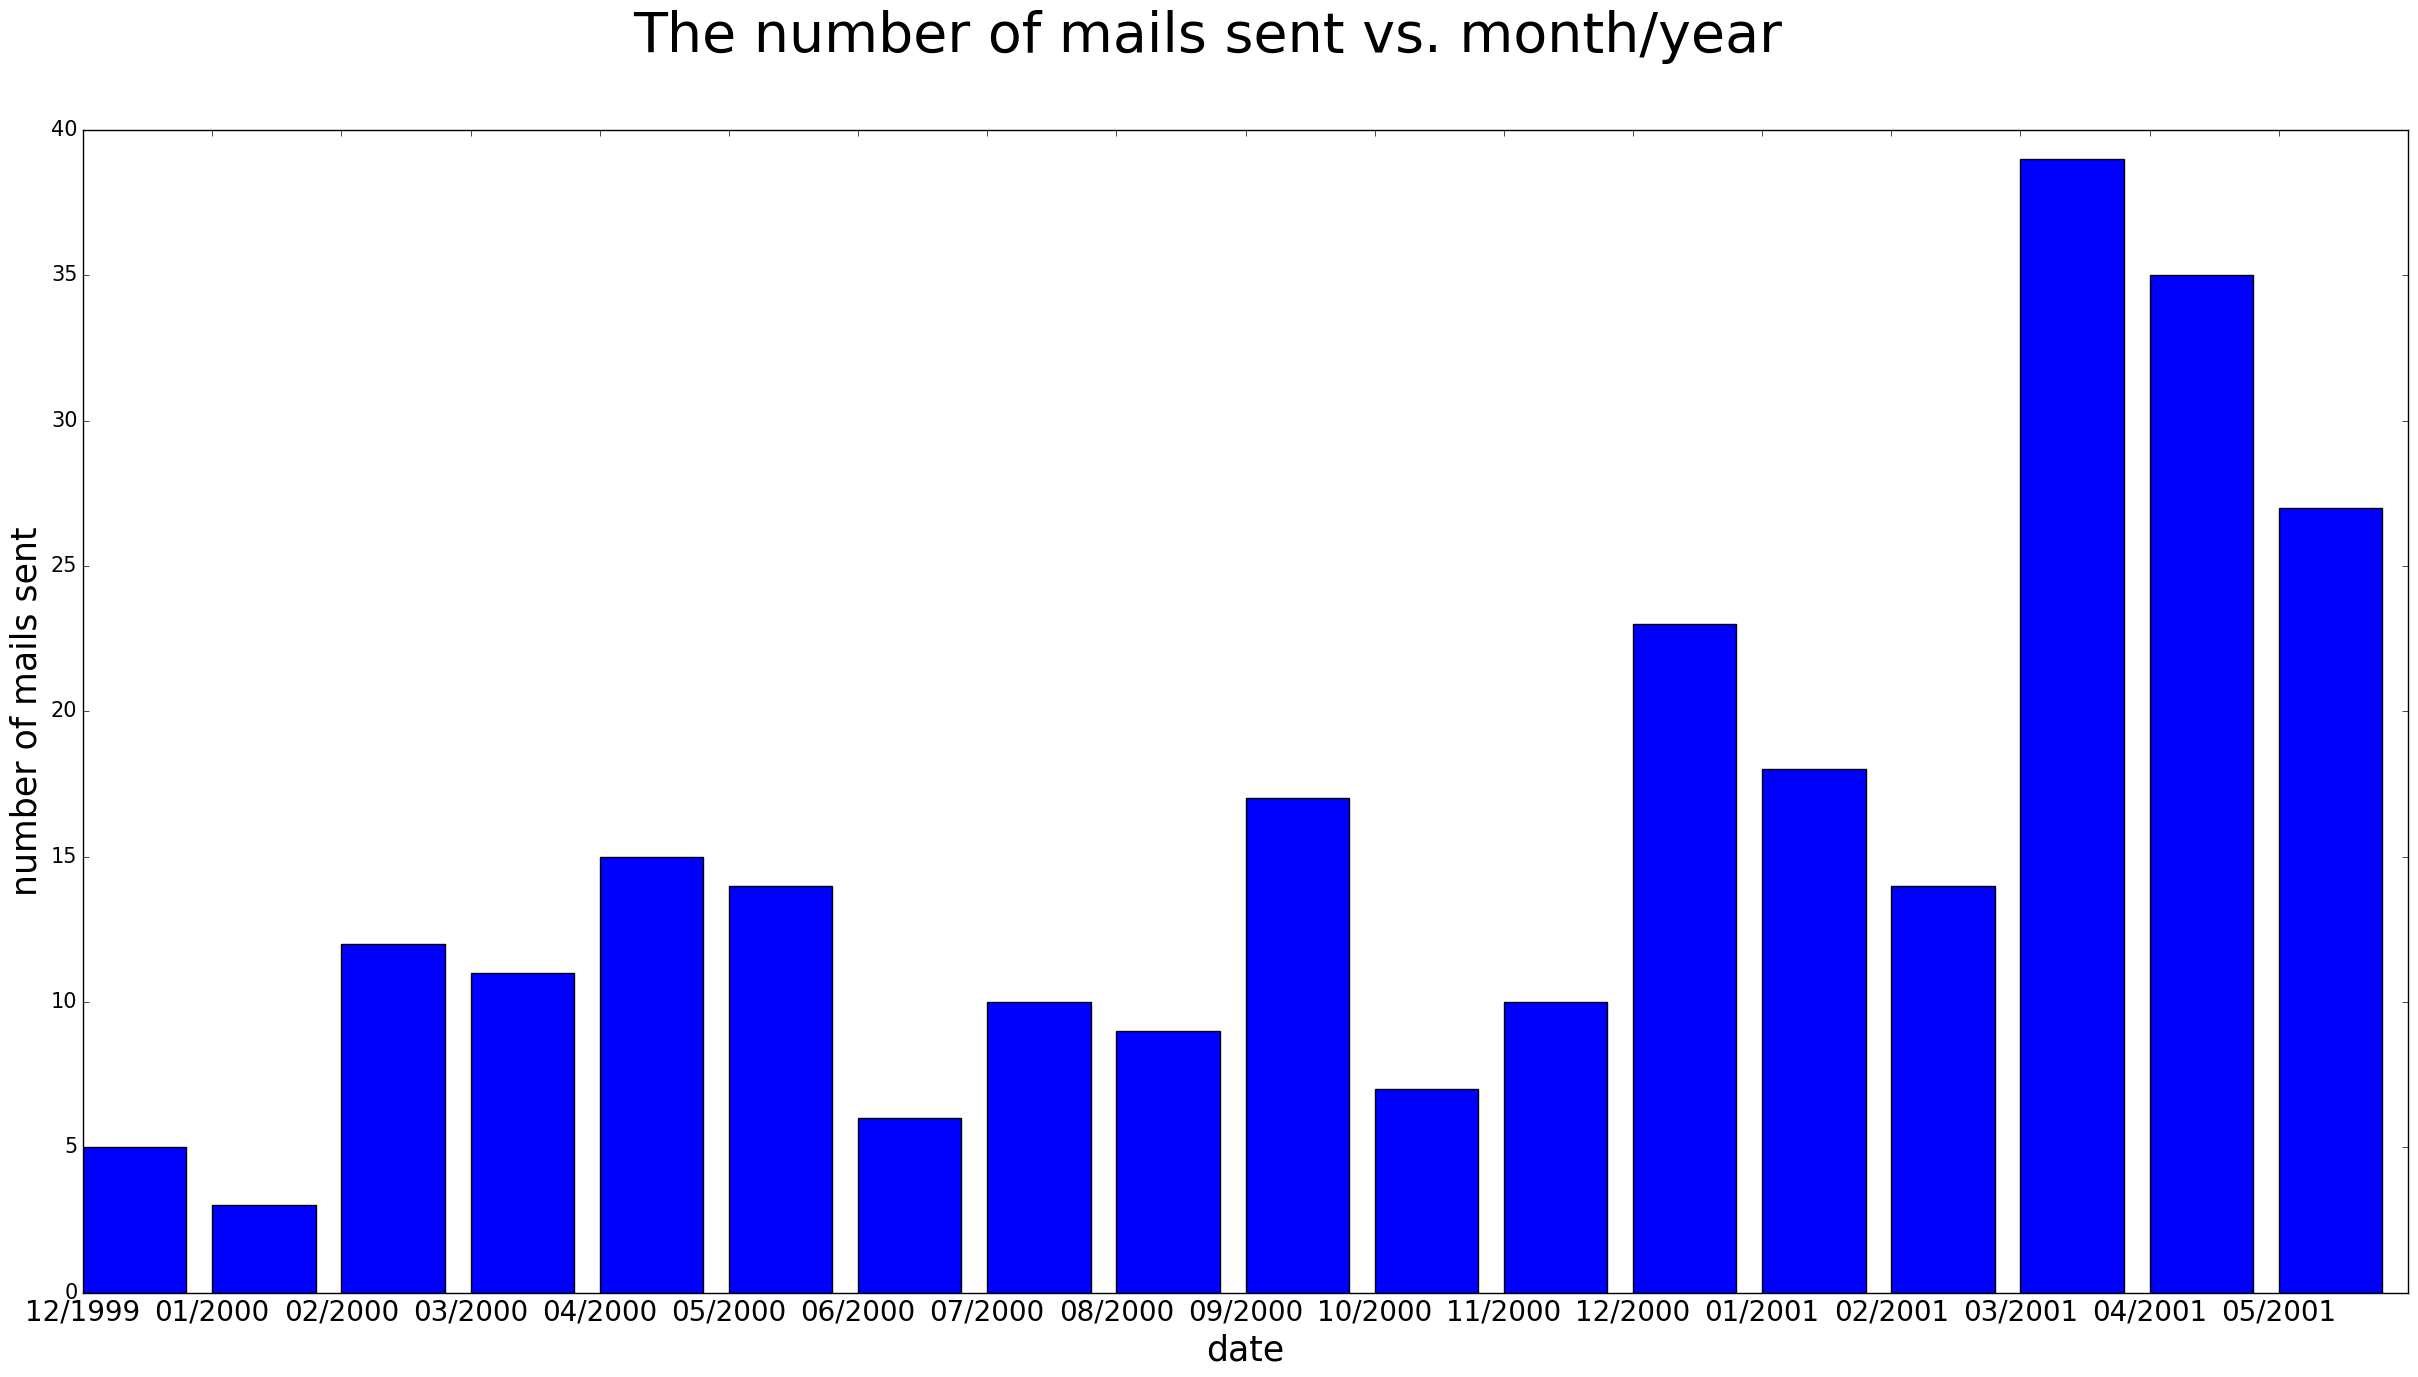

In [76]:
plt.figure(figsize=(30,15))
plt.suptitle('The number of mails sent vs. month/year',fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('number of mails sent',fontsize=25)
plt.xlabel('date',fontsize=25)
plt.bar(range(len(y_list)), y_list, tick_label=x_list)
plt.show() 